# ***GOOGLE STOCK PRICE PREDICTION USING XGBOOST***

# AIM OF THE PROJECT:

The goal of this project is to analyze historical Google stock price data, perform data cleaning and exploratory analysis, and then use supervised machine learning (XGBoost Regressor) to predict the stock’s adjusted close price.

# DETAILED PROCESS:



---



## DATA CLEANING & PREPARATION



*   Drop irrelevant columns: symbol, dividends, splits

* Remove duplicates

* Handle missing values by dropping rows with nulls in key columns (date, open, high, low, close, volume, adjclose)

* Round numerical values for consistency



#EXPLORATORY DATA ANALYSIS (EDA)



---



## UNIVARIATE ANALYSIS



*   Histogram of adjclose → Distribution of adjusted close price

* Line Plot of adjclose → Trend of adjusted close price over time





---



## BIVARIATE ANALYSIS



*   Scatterplot: volume vs adjclose

* Grouped Bar Plot: Average close price per year


## MULTIVARIATE ANALYSIS



*   Multivariate Line Plot: open, close, and adjclose over time → shows trends of multiple prices together

* Pairplot → Explore pairwise relationships among open, high, low, close, volume, and adjclose



#FEATURE ENGINEERING

* Sort dataset by date

* Create lag features (previous 5 days’ adjusted close price)

* Drop rows with missing lag values

#MODEL BUILDING – SUPERVISED LEARNING



1. Define features (lag values) and target (adjclose)
2. Train-test split (80% training, 20% testing)
3. Train an XGBoost Regressor with tuned parameters:
n_estimators=500

    *   learning_rate=0.05
    *   max_depth=5
    *   subsample=0.8
    * colsample_bytree=0.8
    * random_state=42



#MODEL EVALUATION

Metrics used:

*   Mean Squared Error (MSE)

*   R² Score


Compare predicted vs actual prices visually

with line plots

# CONCLUSION

* XGBoost effectively captures stock price patterns using lag features.

* Predictions closely follow actual adjusted close prices, demonstrating the effectiveness of boosting methods for financial time series.

* Further improvements could include:
    *   Adding technical indicators (SMA, EMA, RSI)
    *   Experimenting with hybrid models (LSTM + XGBoost




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf



In [ ]:
#Load data
df=pd.read_csv('/content/Google_Stock_Price.csv')
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [ ]:
#Dropping unnecessary column
df=df.drop(["symbol","dividends","splits"],axis=1)
df

,date,open,high,low,close,volume,adjclose
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846
...,...,...,...,...,...,...,...
1756,2024-12-24,196.169998,197.669998,195.197998,197.570007,6809800,197.570007
1757,2024-12-26,196.740005,198.160004,195.869995,197.100006,7907900,197.100006
1758,2024-12-27,196.470001,196.800003,191.972000,194.039993,14693000,194.039993
1759,2024-12-30,190.865005,193.779999,190.360001,192.690002,12209500,192.690002


In [ ]:
#Remove duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1761 non-null   object 
 1   open      1761 non-null   float64
 2   high      1761 non-null   float64
 3   low       1761 non-null   float64
 4   close     1761 non-null   float64
 5   volume    1761 non-null   int64  
 6   adjclose  1761 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [ ]:
df.describe()

,open,high,low,close,volume,adjclose
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000
mean,102.021411,103.171589,100.982265,102.092157,2.859376e+07,101.754831
std,39.637483,40.020994,39.274690,39.637305,1.317064e+07,39.547744
min,48.695000,50.176998,48.505501,48.811001,6.809800e+06,48.636250
25%,61.463001,62.043999,60.938499,61.496498,1.992200e+07,61.276325
50%,100.059998,101.658997,99.169998,100.739998,2.561200e+07,100.379326
75%,135.570007,137.070999,134.183502,135.990005,3.304600e+07,135.503128
max,198.529999,202.880005,196.690002,198.160004,1.241400e+08,198.160004


In [ ]:
#Round values
df = df.round(2)
df.head()


,date,open,high,low,close,volume,adjclose
0,2018-01-02,52.42,53.35,52.26,53.25,24752000,53.06
1,2018-01-03,53.22,54.31,53.16,54.12,28604000,53.93
2,2018-01-04,54.40,54.68,54.20,54.32,20092000,54.13
3,2018-01-05,54.70,55.21,54.60,55.11,25582000,54.91
4,2018-01-08,55.11,55.56,55.08,55.35,20952000,55.15


In [ ]:
#Handle missing values
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
adjclose,0


In [ ]:
df.dropna(subset=["date","open","high","low","close","volume","adjclose"],inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
adjclose,0


In [ ]:
#Shape of dataset
df.shape

(1761, 7)

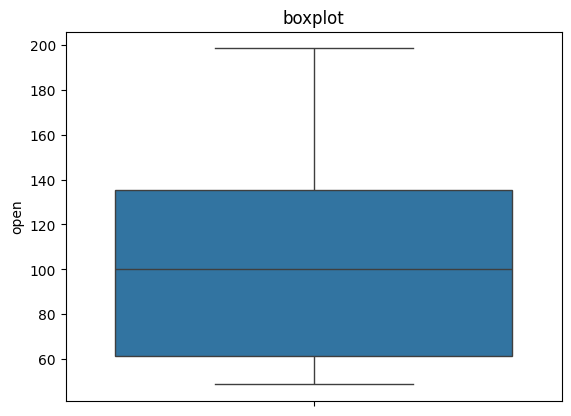

In [ ]:
# -------------------- VISUALIZATIONS --------------------
sns.boxplot(data= df["open"])
plt.title("boxplot")
plt.show()

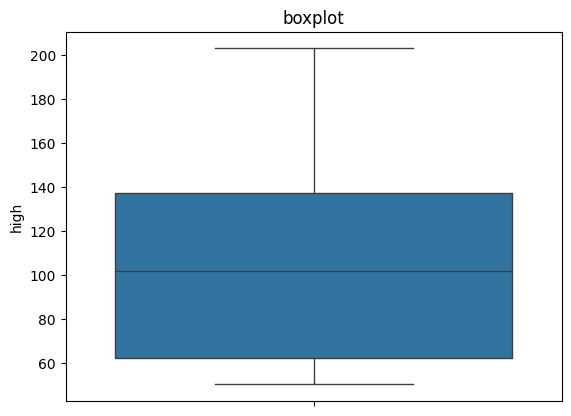

In [ ]:
sns.boxplot(data= df["high"])
plt.title("boxplot")
plt.show()

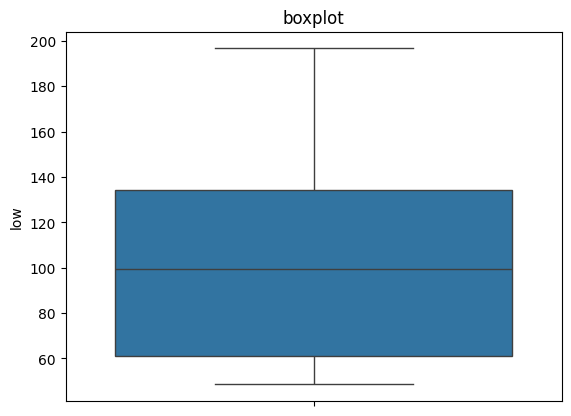

In [ ]:
sns.boxplot(data= df["low"])
plt.title("boxplot")
plt.show()

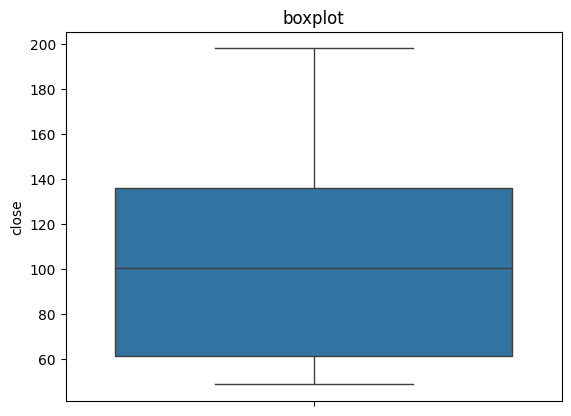

In [ ]:
sns.boxplot(data= df["close"])
plt.title("boxplot")
plt.show()

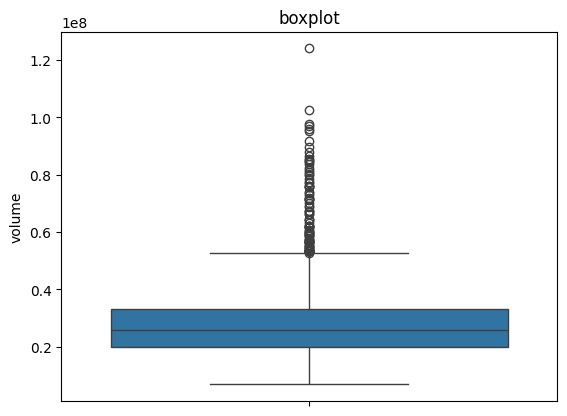

In [ ]:
sns.boxplot(data= df["volume"])
plt.title("boxplot")
plt.show()

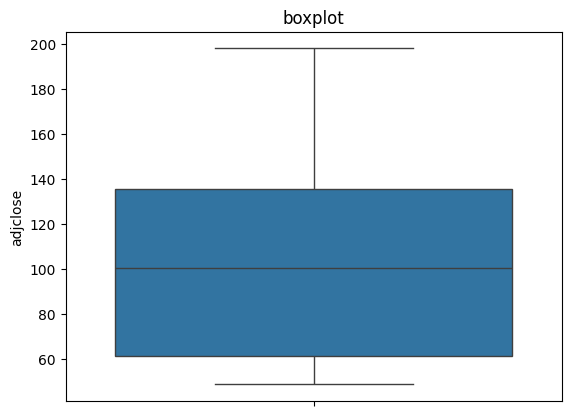

In [ ]:
sns.boxplot(data= df["adjclose"])
plt.title("boxplot")
plt.show()

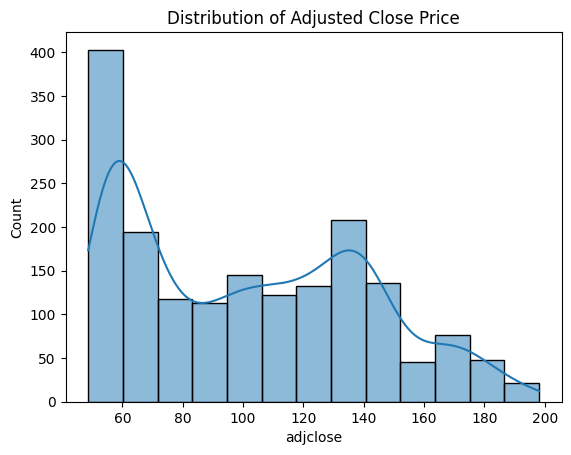

In [ ]:
# Histogram
import seaborn as sns
sns.histplot(df["adjclose"], kde=True)
plt.title("Distribution of Adjusted Close Price")
plt.show()

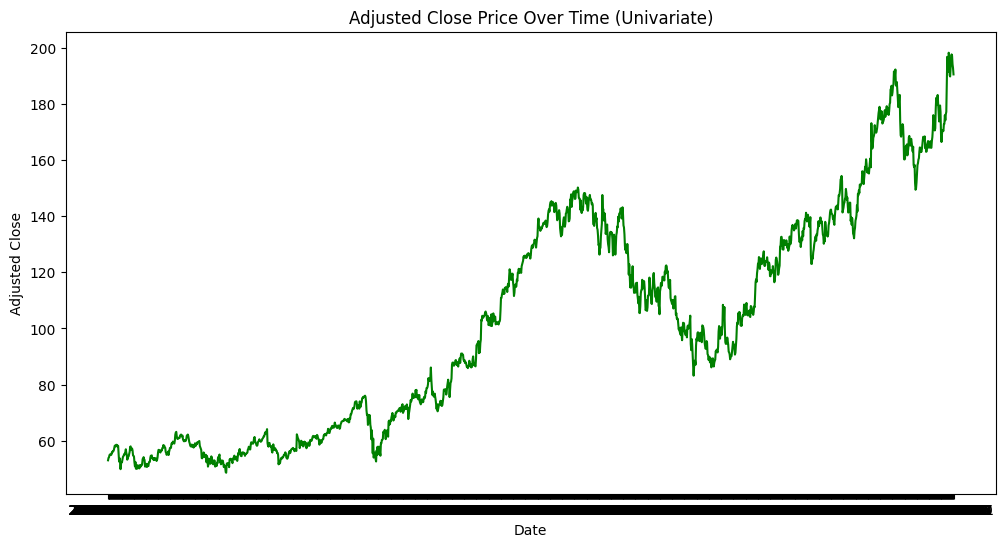

In [ ]:
#Line plot
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["adjclose"], color="green")
plt.title("Adjusted Close Price Over Time (Univariate)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.show()


In [ ]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

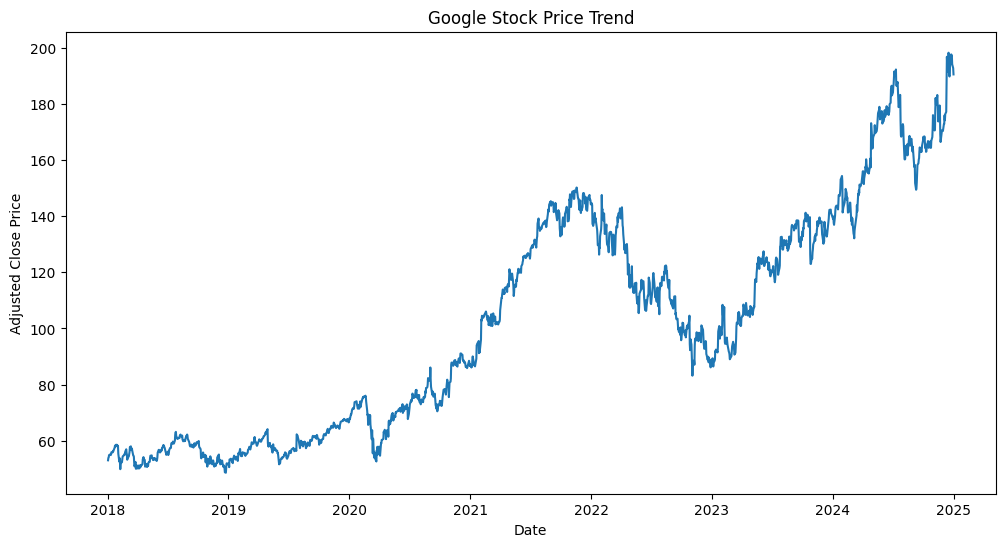

In [ ]:
# Time series trend
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["adjclose"])
plt.title("Google Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.show()


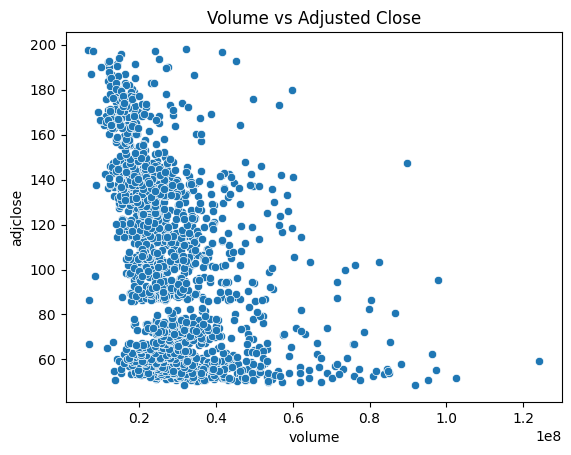

In [ ]:
# Scatterplot
sns.scatterplot(x=df["volume"], y=df["adjclose"])
plt.title("Volume vs Adjusted Close")
plt.show()

/tmp/ipython-input-4155299125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="close", data=avg_yearly, palette="viridis")


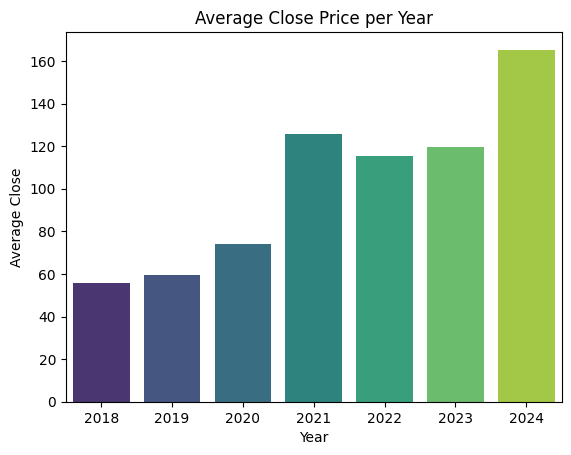

In [ ]:
#Bar Plot (Grouped)
df["year"] = df["date"].dt.year
avg_yearly = df.groupby("year")["close"].mean().reset_index()
sns.barplot(x="year", y="close", data=avg_yearly, palette="viridis")
plt.title("Average Close Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Close")
plt.show()



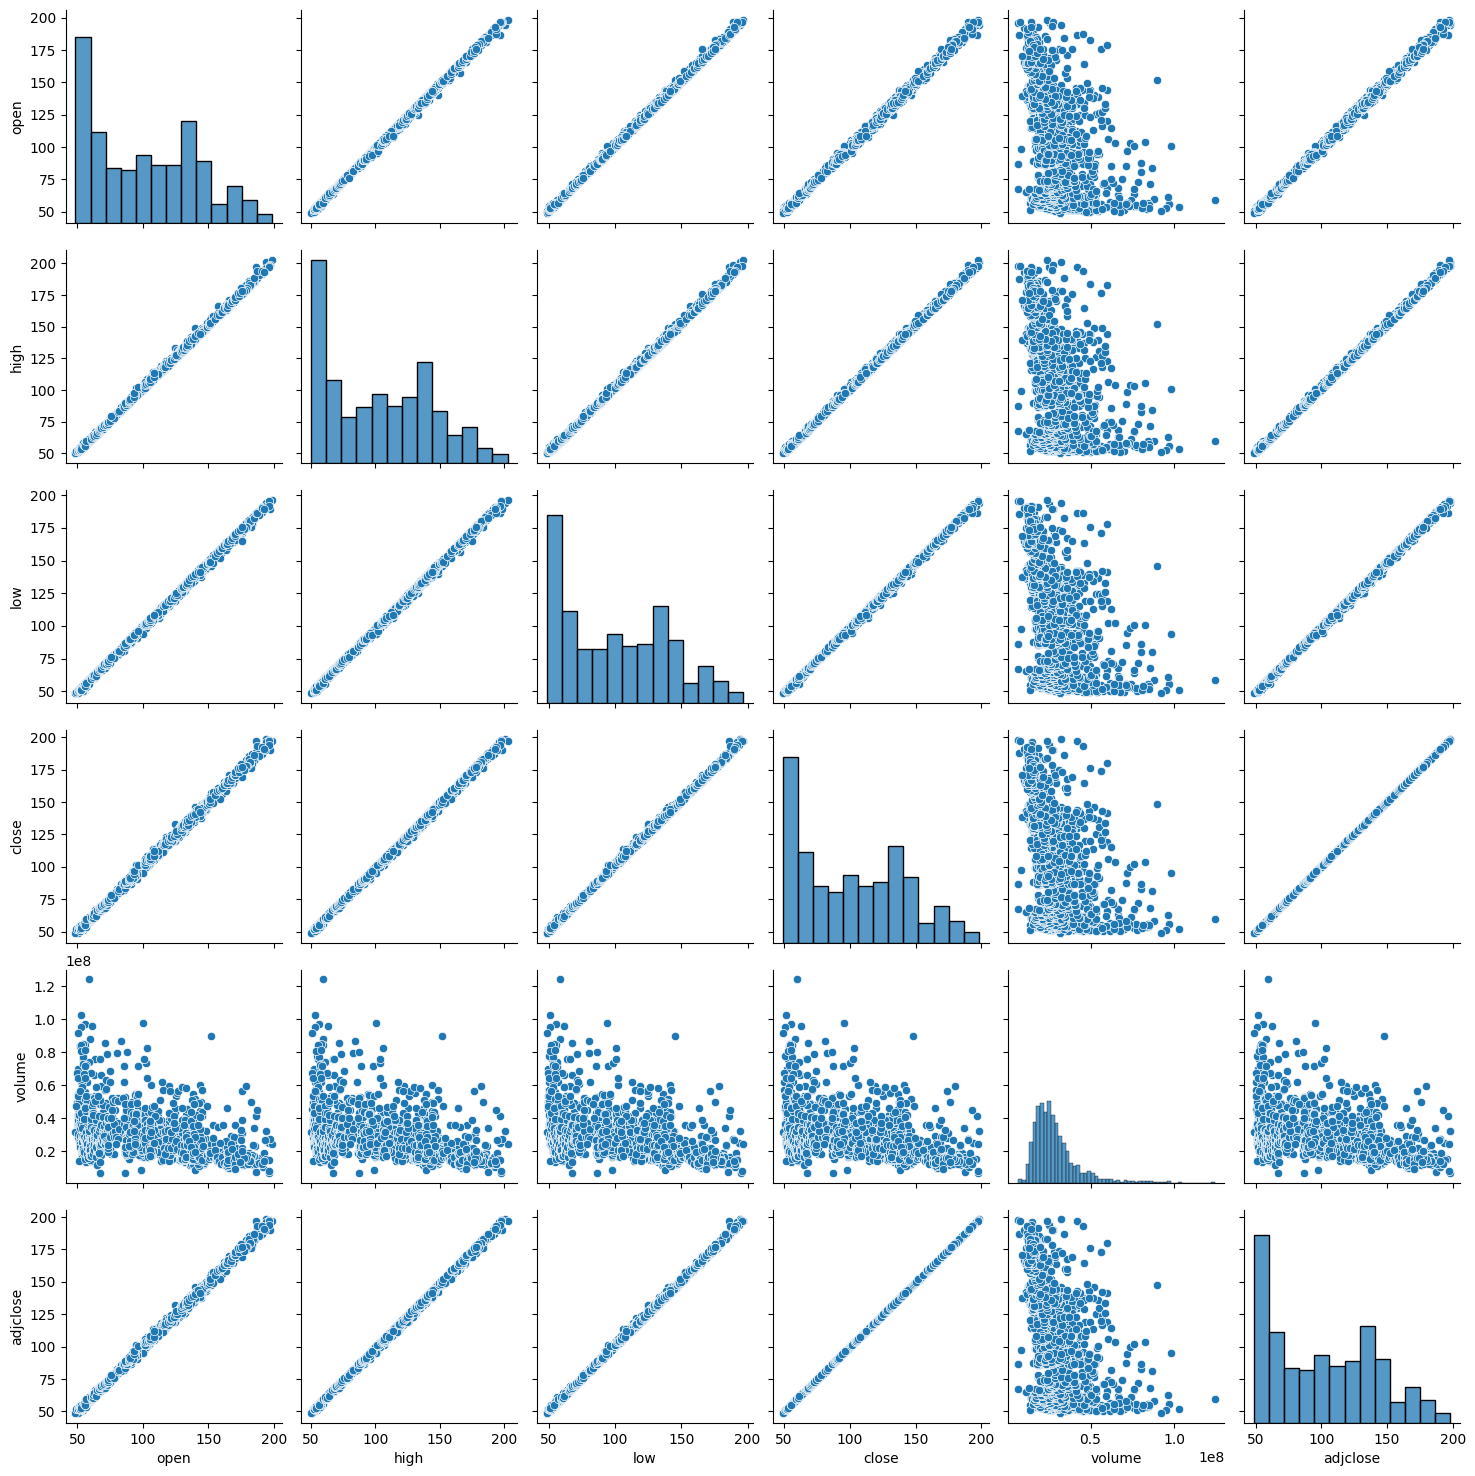

In [ ]:
# Pairplot
sns.pairplot(df[["open","high","low","close","volume","adjclose"]])
plt.show()

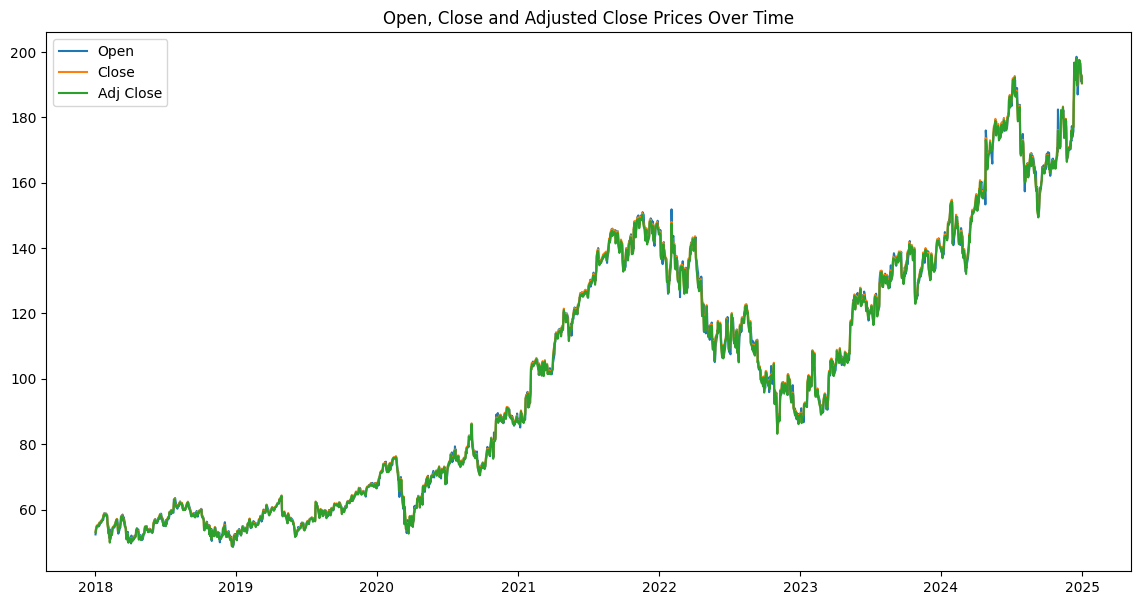

In [ ]:
# Multivariate time series
plt.figure(figsize=(14,7))
plt.plot(df["date"], df["open"], label="Open")
plt.plot(df["date"], df["close"], label="Close")
plt.plot(df["date"], df["adjclose"], label="Adj Close")
plt.legend()
plt.title("Open, Close and Adjusted Close Prices Over Time")
plt.show()


In [ ]:
# -------------------- FEATURES & MODEL --------------------
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Sort by date
df = df.sort_values("date")

# Create lag features (past 5 days)
for i in range(1, 6):
    df[f"adjclose_lag{i}"] = df["adjclose"].shift(i)

df = df.dropna()

# Features & Target
X = df[[f"adjclose_lag{i}" for i in range(1,6)]]
y = df["adjclose"]

# Train-test split
split = int(len(X)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]


In [ ]:
# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Train XGBoost Model
model = xgb.XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=5,subsample=0.8,colsample_bytree=0.8,random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#Evaluate Performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 379.46638490740037
R² Score: -0.0334997724000381


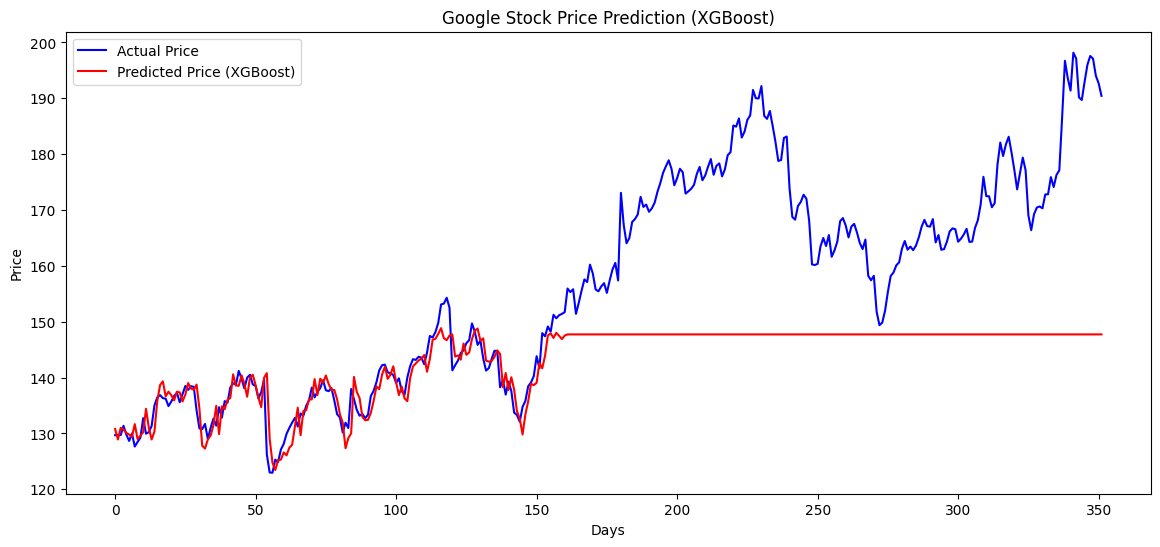

In [ ]:
#Plot Predictions

plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual Price", color="blue")
plt.plot(y_pred, label="Predicted Price (XGBoost)", color="red")
plt.title("Google Stock Price Prediction (XGBoost)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


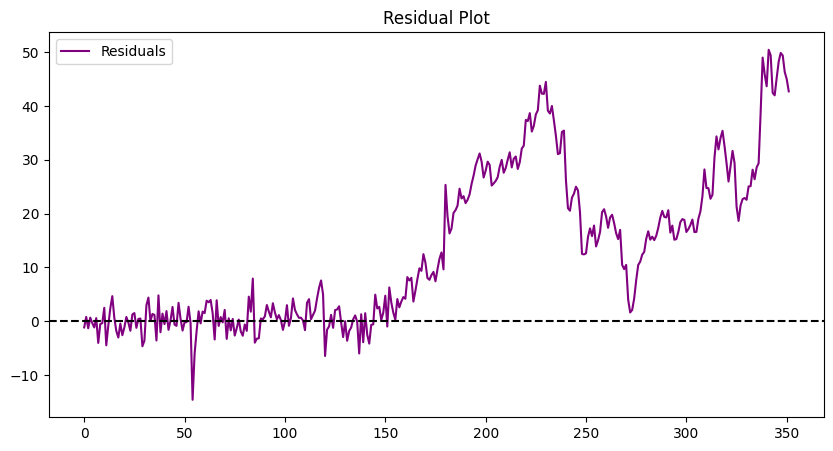

In [ ]:
# Residual Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.values - y_pred, label="Residuals", color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.legend()
plt.title("Residual Plot")
plt.show()

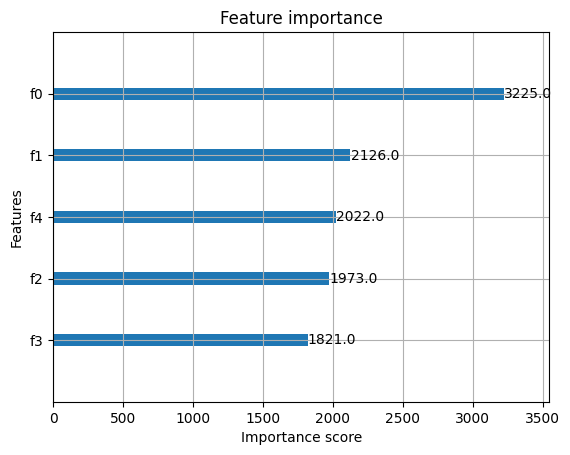

In [ ]:
# Feature Importance
xgb.plot_importance(model, importance_type='weight')
plt.show()